In [1]:
import matplotlib.pyplot as plt

plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.titlecolor'] = 'white'
plt.rcParams['figure.titlesize'] = 30


In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import sys
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud

In [4]:
data = pd.read_csv("./train.csv")

data

,id,document,label
0,1,영상이나 음악이 이쁘다 해도 미화시킨 불륜일뿐,0
1,2,히치콕이 이 영화를 봤다면 분명 박수를 쳤을듯...,1
2,3,괜찮은 음악영화가 또 나왔군요!!! 따뜻한 겨울이 될 것 같아요~,1
3,4,아무래도 20년도지난작품이라 지금보기는너무유치하다,0
4,5,지금까지의 영화들이 그랬듯. 이 영화역시 일본에 대한 미화는 여전하다.,0
...,...,...,...
4995,4996,좋은 배우들로 3류영화를 찍은 안타까운 영화,0
4996,4997,진짜 드럽게 재미없다 에드워드 호퍼 그림에 배경 빼고는 볼게 아닌영화,0
4997,4998,가장 실망스러운 영화.. 지금까지 본영화중..,0
4998,4999,"이런 평점 테러, 네이버에서 좀 막아야 하는 것 아닌가?",1


In [6]:
def check_missing_col(dataframe):
    
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'총 {missing_values}개의 결측치가 존재합니다.\n')
            missing_col.append([col, dataframe[col].dtype])
    print(f'결측치가 있는 컬럼 의 개수는 {counted_missing_col} 입니다')

    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')

    return missing_col

missing_col = check_missing_col(data)
print(missing_col)


결측치가 있는 컬럼 의 개수는 0 입니다
결측치가 존재하지 않습니다
[]


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        5000 non-null   int64 
 1   document  5000 non-null   object
 2   label     5000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 117.3+ KB


In [8]:
val_count = data["label"].value_counts()
print("라벨 0인 리뷰 개수 : " , val_count[0])
print("라벨 1인 리뷰 개수 : " , val_count[1])

라벨 0인 리뷰 개수 :  2564
라벨 1인 리뷰 개수 :  2436


In [9]:
import matplotlib.pyplot as plt # 그래프 그리기 위한 패키지
%matplotlib inline
plt.style.use("ggplot")

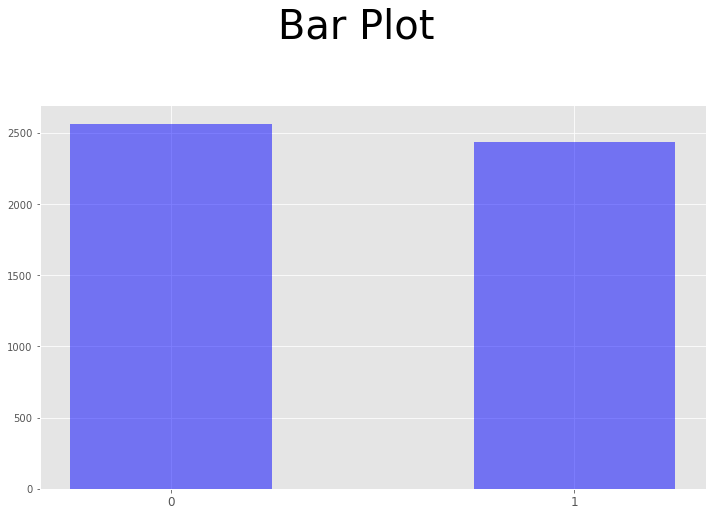

In [11]:
# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
feature = data['label']

plt.figure(figsize=(10,7.5)) # 그래프 이미지 크기 설정
plt.suptitle("Bar Plot", fontsize=40) # 부제목과 폰트 크기 설정

plt.title('label', fontsize=20) # 제목과 폰트 크기 설정
temp = feature.value_counts() # feature 변수의 변수별 개수 계산
plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5) # 막대그래프 생성
plt.xticks(temp.keys(), fontsize=12) # x축 값, 폰트 크기 설정
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 레이아웃 설정
plt.show() # 그래프 나타내기

In [12]:
str_len_mean = np.mean(data["document"].str.len())
print("리뷰의 평균 길이 :", str_len_mean)

리뷰의 평균 길이 : 27.1352


In [28]:
data["document"].str.len()

0       25
1       28
2       36
3       27
4       39
        ..
4995    24
4996    38
4997    25
4998    31
4999    35
Name: document, Length: 5000, dtype: int64

In [29]:
data.label == 1


0       False
1        True
2        True
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998     True
4999    False
Name: label, Length: 5000, dtype: bool

In [39]:
mask_pos = (data.label == 1)
mask_neg = (data.label == 0)

df_train = data.document.copy()
df_pos = data.loc[mask_pos,:].document
df_neg = data.loc[mask_neg,:].document

compare = [df_train,df_pos,df_neg]

In [36]:
plt.figure(figsize=(20,7.5))
plt.suptitle("Histogram: review length", fontsize=40)
name = ['total dataset', 'positive reviews', 'negative reviews'] # 제목으로 사용할 문자열

for i in range(len(compare)):
    document = compare[i]
    string_len = [len(x) for x in document]

pandas.core.series.Series

In [42]:
len(compare)

3

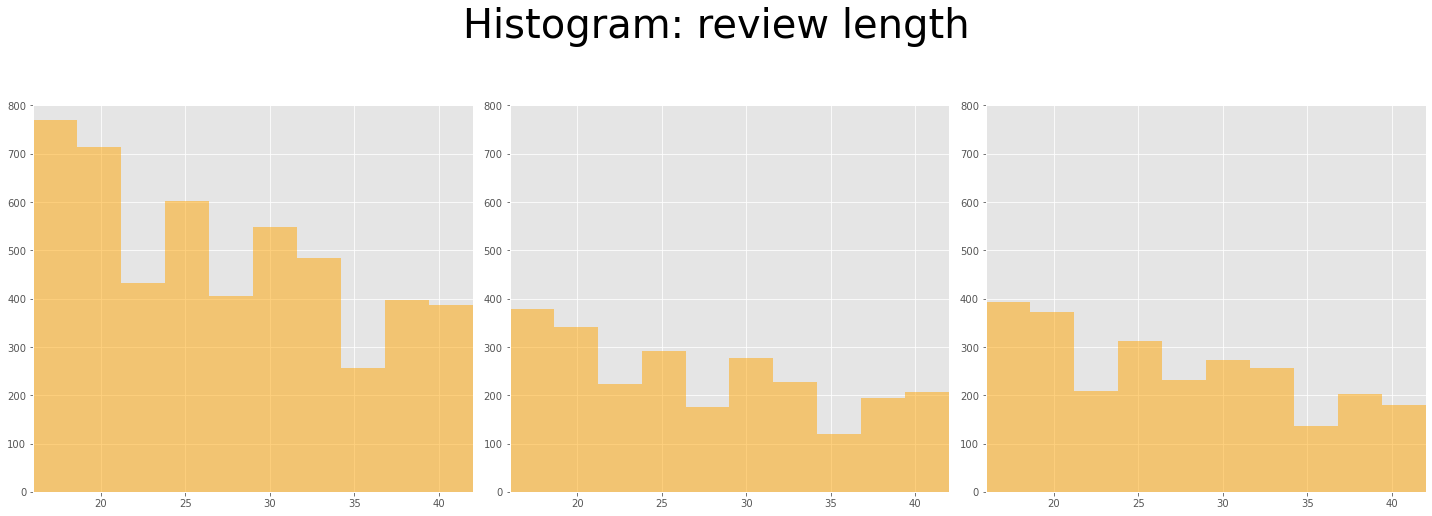

In [43]:
# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
plt.figure(figsize=(20,7.5))
plt.suptitle("Histogram: review length", fontsize=40)
name = ['total dataset', 'positive reviews', 'negative reviews'] # 제목으로 사용할 문자열

for i in range(len(compare)):
    document = compare[i]
    string_len = [len(x) for x in document]    
    plt.subplot(1,3,i+1) # 행 개수/ 열 개수/ 해당 그래프 표시 순서
    plt.title(name[i], fontsize=20)
    plt.axis([16, 42, 0, 800])  #x축 시작, 끝 / y축 시작, 끝
    plt.hist(string_len, alpha=0.5, color='orange') # 히스토그램 생성, alpha: 그래프의 투명도 조절
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [44]:
word_split = data['document'].str.split() # 공백을 기준으로 문자열을 분리해줍니다.
word_split[:5] # 상위 5개 값 확인

0                     [영상이나, 음악이, 이쁘다, 해도, 미화시킨, 불륜일뿐]
1                 [히치콕이, 이, 영화를, 봤다면, 분명, 박수를, 쳤을듯...]
2       [괜찮은, 음악영화가, 또, 나왔군요!!!, 따뜻한, 겨울이, 될, 것, 같아요~]
3                      [아무래도, 20년도지난작품이라, 지금보기는너무유치하다]
4    [지금까지의, 영화들이, 그랬듯., 이, 영화역시, 일본에, 대한, 미화는, 여전하다.]
Name: document, dtype: object

In [47]:
data["document"].str.split()

0                        [영상이나, 음악이, 이쁘다, 해도, 미화시킨, 불륜일뿐]
1                    [히치콕이, 이, 영화를, 봤다면, 분명, 박수를, 쳤을듯...]
2          [괜찮은, 음악영화가, 또, 나왔군요!!!, 따뜻한, 겨울이, 될, 것, 같아요~]
3                         [아무래도, 20년도지난작품이라, 지금보기는너무유치하다]
4       [지금까지의, 영화들이, 그랬듯., 이, 영화역시, 일본에, 대한, 미화는, 여전하다.]
                              ...                        
4995                      [좋은, 배우들로, 3류영화를, 찍은, 안타까운, 영화]
4996    [진짜, 드럽게, 재미없다, 에드워드, 호퍼, 그림에, 배경, 빼고는, 볼게, 아닌영화]
4997                      [가장, 실망스러운, 영화.., 지금까지, 본영화중..]
4998            [이런, 평점, 테러,, 네이버에서, 좀, 막아야, 하는, 것, 아닌가?]
4999          [여주인공이, 전작에서는, 귀여웠는데,, 여기선, 완전, 망했네,, 실망이다]
Name: document, Length: 5000, dtype: object

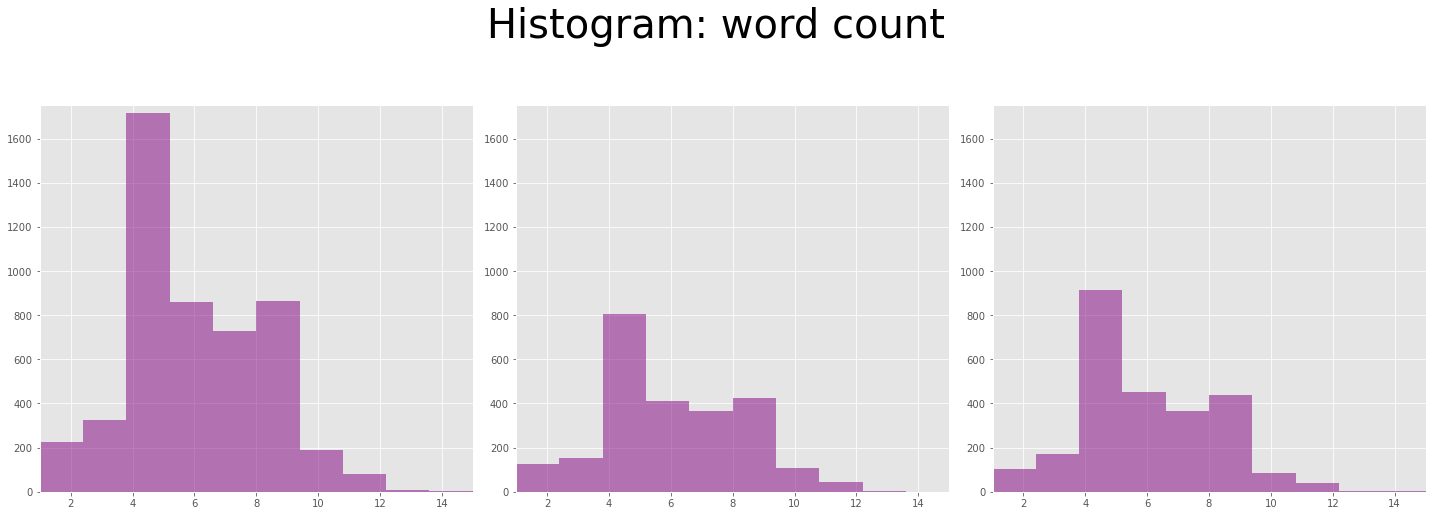

In [48]:
# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
plt.figure(figsize=(20,7.5))
plt.suptitle("Histogram: word count", fontsize=40)
name = ['total dataset', 'positive reviews', 'negative reviews'] # 제목으로 사용할 문자열

for i in range(len(compare)):
    document = compare[i]
    split = document.str.split()
    split_len = [len(x) for x in split] 
    plt.subplot(1,3,i+1) # 행 개수/ 열 개수/ 해당 그래프 표시 순서
    plt.title(name[i], fontsize=20)
    plt.axis([1, 15, 0, 1750])  #x축 시작, 끝 / y축 시작, 끝
    plt.hist(split_len, alpha=0.5, color='purple')
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()